In [58]:
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from axessettings import AxesSetting, linear_sim

In [59]:
data = pd.read_excel("data.xlsx", sheet_name="(3)", skiprows=[0, 2], header=[0])

data

,V_GS,V_DS
0,0.00,0.559
1,0.50,5.080
2,1.00,17.370
3,1.50,19.900
4,2.00,19.900
5,2.40,19.900
6,0.10,0.638
7,0.20,0.740
8,0.30,0.953
9,0.40,2.166


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


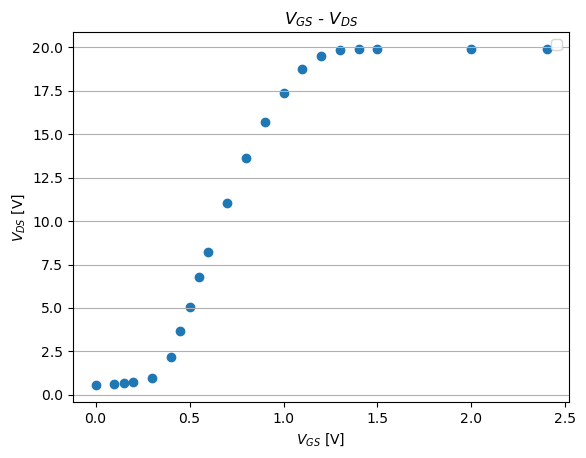

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)

axessetting = AxesSetting(legend=True, xlabel="$V_{GS}$ [V]", grid="y", ylabel="$V_{DS}$ [V]", title="$V_{GS}$ - $V_{DS}$")
ax.scatter(data["V_GS"], data["V_DS"])
axessetting.apply_axes(ax)